In [22]:
from env import host, username, password
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from datetime import date

import nick_acquire as get 
import nick_wrangle as w
import nick_prepare as prep

In [17]:
df = get.acquire_superstore_data()

Using cached CSV


In [21]:
#describe.describe_data(df)

In [23]:
df

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,customer_name,product_name,category,sub_category,region_name
0,FUR-BO-10001798,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Claire Gute,Bush Somerset Collection Bookcase,Furniture,Bookcases,South
1,FUR-CH-10000454,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",Furniture,Chairs,South
2,FUR-TA-10000577,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,South
3,OFF-ST-10000760,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Sean O'Donnell,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,South
4,OFF-PA-10002365,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Andrew Allen,Xerox 1967,Office Supplies,Paper,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,OFF-BI-10002824,BN-11515,CA-2016-169943,2016-05-19,2016-05-24,Standard Class,Consumer,New York City,New York,10011.0,47.7440,4.0,0.20,14.9200,Bradley Nguyen,Recycled Easel Ring Binders,Office Supplies,Binders,East
1730,OFF-AP-10000828,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,Philadelphia,Pennsylvania,19143.0,434.3520,3.0,0.20,43.4352,Jay Kimmel,Avanti 4.4 Cu. Ft. Refrigerator,Office Supplies,Appliances,East
1731,OFF-AP-10002906,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,Philadelphia,Pennsylvania,19143.0,3.5520,2.0,0.20,0.4440,Jay Kimmel,Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,Office Supplies,Appliances,East
1732,OFF-AP-10003860,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,Philadelphia,Pennsylvania,19143.0,88.8320,4.0,0.20,7.7728,Jay Kimmel,Fellowes Advanced 8 Outlet Surge Suppressor with Phone/Fax Protection,Office Supplies,Appliances,East


There are not any nulls or missing values to handle, which is good. I'll need to convert columns to snake_case.
The following columns are redundant: Region ID and Category ID because they're most descriptively captured via their respective names; Country is unnecessary, because everything is in the United States. 
Order_date and ship_date can be converted to date-time formats.
I can create month and year columns from the dates given. 

In [17]:
# Conversions: column names decapitalized, white-space converted to underscores
df.columns = [col.lower().replace(" ","_").replace("-","_") for col in df.columns]

In [18]:
df = df.drop(['region_id', 'category_id', 'country'], axis=1) 

In [25]:
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date']= pd.to_datetime(df['ship_date'])

In [26]:
df['days_bw_shipment'] = df['ship_date'] - df['order_date']

In [28]:
df = df.set_index('order_date').sort_index()

In [29]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

In [30]:
df

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,discount,profit,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,0.2,4.2717,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,0.2,-64.7748,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,0.8,-5.4870,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,0.2,9.7500,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,0.2,1.1680,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,0.0,56.5110,Chuck Clark,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017
2017-12-30,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,...,0.2,19.7910,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,East,4 days,December,2017
2017-12-30,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,...,0.0,2.7279,Patrick O'Donnell,Gear Head AU3700S Headset,Technology,Phones,East,4 days,December,2017


In [38]:
# Take it all and wrap it into a prepare function
def prepare_superstore(df):
    '''
    '''
    # First obtain the DataFrame and define the variable. 
    df = get.acquire_superstore_data()
    # Next convert column names to snake_case
    print('Data acquired: Initializing Preparatory Stage...')
    df.columns = [col.lower().replace(" ","_").replace("-","_") for col in df.columns]
    # drop redundant columns
    df = df.drop(['region_id', 'category_id', 'country'], axis=1)
    # Convert columns to date_time
    df['order_date']= pd.to_datetime(df['order_date'])
    df['ship_date']= pd.to_datetime(df['ship_date'])
    # Calculate days between shipment and order placement
    df['days_bw_shipment'] = df['ship_date'] - df['order_date']
    # Sort index by order date
    df = df.set_index('order_date').sort_index()
    # Create columns for month and year
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    print('Preparation complete. DF ready to be split for EDA.')
    # get the DF
    return df

In [39]:
df = get.acquire_superstore_data()

Using cached CSV


In [40]:
df = prepare_superstore(df)

Using cached CSV
Data acquired: Initializing Preparatory Stage...
Preparation complete. DF ready to be split for EDA.


In [41]:
df

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,discount,profit,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,0.2,4.2717,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,0.2,-64.7748,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,0.8,-5.4870,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,0.2,9.7500,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,0.2,1.1680,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,0.0,56.5110,Chuck Clark,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017
2017-12-30,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,...,0.2,19.7910,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,East,4 days,December,2017
2017-12-30,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,...,0.0,2.7279,Patrick O'Donnell,Gear Head AU3700S Headset,Technology,Phones,East,4 days,December,2017


In [50]:
def split_superstore_data(df):
    '''
   Using methods gleaned from Codeup's Time Series Analysis lessons,
   splits the Superstore DF into Train Validate and Split; .5/.3/.2 respectively.
   Subsequently returns each.
    '''
    print('Dataframe Input received: Splitting Data .5/.3/.2.')
    train_size = int(len(df) * .5)
    validate_size = int(len(df) * .3)
    test_size = int(len(df) - train_size - validate_size)
    validate_end_index = train_size + validate_size

    # split into train, validation, test
    train = df[: train_size]
    validate = df[train_size : validate_end_index]
    test = df[validate_end_index : ]
    print(f'Train: {train.shape}, Validate {validate.shape}, and Test {test.shape} are ready.\
    \n Proceed with EDA.')
    return train, validate, test

In [51]:
train, validate, test = split_superstore_data(df)

Dataframe Input received: Splitting Data .5/.3/.2.
Train: (867, 21), Validate (520, 21), and Test (347, 21) are ready.    
 Proceed with EDA.


In [52]:
# Combine all into wrangle. 
import nick_wrangle as w

In [2]:
train, validate, test = w.wrangle_superstore()

NameError: name 'df' is not defined

In [ ]:
# While looking through explore it seemed that it'll be helpful to also create a profit and sales per product 
# when considering this, it may be important to narrow this down by considering the sales and profit per each product 
# add profit per product column
df['profit_per_product'] = df.profit / df.quantity

# add sales per product
df['sales_per_product'] = df.sales / df.quantity

In [4]:
# Some final column reorganizaiton, since only the first and last ten are shown, causing me to miss out on seeing
# what I am most interested in
df = prep.prepare_superstore(df)

Using cached CSV


In [13]:
def reorder_df(df):
    # Reordered month in df
    df_columns = [col for col in df.columns if col != 'month']
    df_columns.insert(8, 'month')
    df = df[df_columns]
    
    # Reordered year in df
    df_columns = [col for col in df.columns if col != 'year']
    df_columns.insert(0, 'year')
    df = df[df_columns]
    
    # Reordered month in df
    df_columns = [col for col in df.columns if col != 'month']
    df_columns.insert(0, 'month')
    df = df[df_columns]
    
    # Reordered customer_name in df
    df_columns = [col for col in df.columns if col != 'customer_name']
    df_columns.insert(10, 'customer_name')
    df = df[df_columns]
    
    # Reordered region_name in df
    df_columns = [col for col in df.columns if col != 'region_name']
    df_columns.insert(2, 'region_name')
    df = df[df_columns]
    
    # Reordered sales in df
    df_columns = [col for col in df.columns if col != 'sales']
    df_columns.insert(21, 'sales')
    df = df[df_columns]
    
    # Reordered profit in df
    df_columns = [col for col in df.columns if col != 'profit']
    df_columns.insert(19, 'profit')
    df = df[df_columns]
    
    # Reordered quantity in df
    df_columns = [col for col in df.columns if col != 'quantity']
    df_columns.insert(18, 'quantity')
    df = df[df_columns]
    
    # Reordered discount in df
    df_columns = [col for col in df.columns if col != 'discount']
    df_columns.insert(18, 'discount')
    df = df[df_columns]
    
    return df


In [14]:
df = reorder_df(df)

In [15]:
df

,month,year,region_name,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,...,product_name,category,sub_category,days_bw_shipment,quantity,discount,profit,profit_per_product,sales,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,January,2014,Central,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,Avery 508,Office Supplies,Labels,4 days,3.0,0.2,4.2717,1.4239,11.784,3.928
2014-01-04,January,2014,Central,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,SAFCO Boltless Steel Shelving,Office Supplies,Storage,4 days,3.0,0.2,-64.7748,-21.5916,272.736,90.912
2014-01-04,January,2014,Central,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,...,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,4 days,2.0,0.8,-5.4870,-2.7435,3.540,1.770
2014-01-09,January,2014,Central,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Memorex Micro Travel Drive 8 GB,Technology,Accessories,4 days,3.0,0.2,9.7500,3.2500,31.200,10.400
2014-01-09,January,2014,Central,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,...,Newell 312,Office Supplies,Art,4 days,2.0,0.2,1.1680,0.5840,9.344,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,December,2017,Central,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,...,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,6 days,2.0,0.0,56.5110,28.2555,209.300,104.650
2017-12-30,December,2017,East,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,...,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,4 days,3.0,0.2,19.7910,6.5970,52.776,17.592
2017-12-30,December,2017,East,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,...,Gear Head AU3700S Headset,Technology,Phones,4 days,7.0,0.0,2.7279,0.3897,90.930,12.990


In [12]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-miffktckli")

MitoWidget(analysis_data_json='{"analysisName": "id-miffktckli", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; # Analysis Name:id-miffktckli;
    
# Reordered sales in df
df_columns = [col for col in df.columns if col != 'sales']
df_columns.insert(21, 'sales')
df = df[df_columns]

# Reordered profit in df
df_columns = [col for col in df.columns if col != 'profit']
df_columns.insert(19, 'profit')
df = df[df_columns]

# Reordered quantity in df
df_columns = [col for col in df.columns if col != 'quantity']
df_columns.insert(18, 'quantity')
df = df[df_columns]

# Reordered discount in df
df_columns = [col for col in df.columns if col != 'discount']
df_columns.insert(18, 'discount')
df = df[df_columns]


In [18]:
# For the sake of reconsidering a split of just Train and Test 
def prepare_superstore(df):
    '''
    '''
    # First obtain the DataFrame and define the variable. 
    df = get.acquire_superstore_data()
    # Next convert column names to snake_case
    df.columns = [col.lower().replace(" ","_").replace("-","_") for col in df.columns]
    # drop redundant columns
    df = df.drop(['region_id', 'category_id', 'country'], axis=1)
    # Convert columns to date_time
    df['order_date']= pd.to_datetime(df['order_date'])
    df['ship_date']= pd.to_datetime(df['ship_date'])
    # Calculate days between shipment and order placement
    df['days_bw_shipment'] = df['ship_date'] - df['order_date']
    # Sort index by order date
    df = df.set_index('order_date').sort_index()
    # Create columns for month and year
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    # Create product-based columns
    df['profit_per_product'] = df.profit / df.quantity
    # add sales per product
    df['sales_per_product'] = df.sales / df.quantity
    # get the DF
    return df

def reorder_df(df):
    # Reordered month in df
    df_columns = [col for col in df.columns if col != 'month']
    df_columns.insert(8, 'month')
    df = df[df_columns]
    
    # Reordered year in df
    df_columns = [col for col in df.columns if col != 'year']
    df_columns.insert(0, 'year')
    df = df[df_columns]
    
    # Reordered month in df
    df_columns = [col for col in df.columns if col != 'month']
    df_columns.insert(0, 'month')
    df = df[df_columns]
    
    # Reordered customer_name in df
    df_columns = [col for col in df.columns if col != 'customer_name']
    df_columns.insert(10, 'customer_name')
    df = df[df_columns]
    
    # Reordered region_name in df
    df_columns = [col for col in df.columns if col != 'region_name']
    df_columns.insert(2, 'region_name')
    df = df[df_columns]
    
    # Reordered sales in df
    df_columns = [col for col in df.columns if col != 'sales']
    df_columns.insert(21, 'sales')
    df = df[df_columns]
    
    # Reordered profit in df
    df_columns = [col for col in df.columns if col != 'profit']
    df_columns.insert(19, 'profit')
    df = df[df_columns]
    
    # Reordered quantity in df
    df_columns = [col for col in df.columns if col != 'quantity']
    df_columns.insert(18, 'quantity')
    df = df[df_columns]
    
    # Reordered discount in df
    df_columns = [col for col in df.columns if col != 'discount']
    df_columns.insert(18, 'discount')
    df = df[df_columns]
    
    return df

In [19]:
df = prepare_superstore(df)

Using cached CSV


In [20]:
df

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,Chuck Clark,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017,28.2555,104.650
2017-12-30,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,...,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,East,4 days,December,2017,6.5970,17.592
2017-12-30,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,...,Patrick O'Donnell,Gear Head AU3700S Headset,Technology,Phones,East,4 days,December,2017,0.3897,12.990


/var/folders/qn/sd1_3x2j4196db03067vql600000gn/T/ipykernel_58400/3313433.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


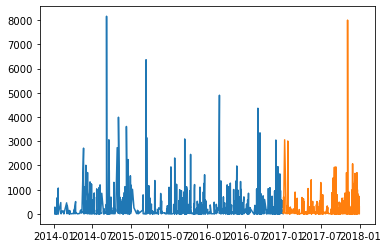

In [23]:
# human based apporach
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)

In [24]:
train.shape, test.shape

((1238, 23), (496, 23))

In [25]:
df.shape

(1734, 23)

In [28]:
train

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24,OFF-ST-10003716,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,540.048,...,Ross Baird,Tennsco Double-Tier Lockers,Office Supplies,Storage,South,4 days,December,2016,-15.7514,180.016
2016-12-24,OFF-BI-10001575,RB-19795,US-2016-168620,2016-12-28,Second Class,Home Office,Charlotte,North Carolina,28205.0,27.882,...,Ross Baird,GBC Linen Binding Covers,Office Supplies,Binders,South,4 days,December,2016,-6.8156,9.294
2016-12-26,OFF-PA-10003673,FP-14320,US-2016-153129,2016-12-30,Standard Class,Consumer,Seattle,Washington,98105.0,33.900,...,Frank Preis,Strathmore Photo Mount Cards,Office Supplies,Paper,West,4 days,December,2016,3.1188,6.780


In [29]:
test

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,FUR-FU-10003878,GA-14725,CA-2017-107503,2017-01-06,Standard Class,Consumer,Lorain,Ohio,44052.0,48.896,...,Guy Armstrong,"Linden 10"" Round Wall Clock, Black",Furniture,Furnishings,East,5 days,January,2017,2.1392,12.224
2017-01-02,OFF-BI-10003694,AS-10045,CA-2017-113481,2017-01-04,First Class,Corporate,Jacksonville,North Carolina,28540.0,15.660,...,Aaron Smayling,"Avery 3 1/2"" Diskette Storage Pages, 10/Pack",Office Supplies,Binders,South,2 days,January,2017,-2.5056,3.132
2017-01-02,TEC-MA-10002178,AS-10045,CA-2017-113481,2017-01-04,First Class,Corporate,Jacksonville,North Carolina,28540.0,695.700,...,Aaron Smayling,Cisco CP-7937G Unified IP Conference Station Phone,Technology,Machines,South,2 days,January,2017,-13.9140,347.850
2017-01-02,OFF-BI-10000474,AS-10045,CA-2017-113481,2017-01-04,First Class,Corporate,Jacksonville,North Carolina,28540.0,28.854,...,Aaron Smayling,Avery Recycled Flexi-View Covers for Binding Systems,Office Supplies,Binders,South,2 days,January,2017,-3.5266,4.809
2017-01-07,TEC-MA-10000822,BW-11110,CA-2017-159366,2017-01-10,First Class,Corporate,Detroit,Michigan,48205.0,3059.982,...,Bart Watters,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,Central,3 days,January,2017,339.9980,1529.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,Chuck Clark,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017,28.2555,104.650
2017-12-30,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,...,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,East,4 days,December,2017,6.5970,17.592
2017-12-30,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,...,Patrick O'Donnell,Gear Head AU3700S Headset,Technology,Phones,East,4 days,December,2017,0.3897,12.990


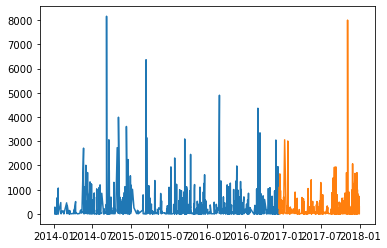

In [30]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train2 = df[:test_start_index] # everything up (not including) to the test_start_index
test2 = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train2.index, train2.sales)
plt.plot(test2.index, test2.sales)

In [31]:
train2

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,...,Phillina Ober,Avery 508,Office Supplies,Labels,Central,4 days,January,2014,1.4239,3.928
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,...,Phillina Ober,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,4 days,January,2014,-21.5916,90.912
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,...,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,4 days,January,2014,-2.7435,1.770
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,...,Melanie Seite,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,4 days,January,2014,3.2500,10.400
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,...,Melanie Seite,Newell 312,Office Supplies,Art,Central,4 days,January,2014,0.5840,4.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-11,FUR-FU-10001935,AR-10825,CA-2016-160745,2016-12-16,Second Class,Corporate,Vancouver,Washington,98661.0,14.800,...,Anthony Rawles,3M Hangers With Command Adhesive,Furniture,Furnishings,West,5 days,December,2016,1.5170,3.700
2016-12-11,OFF-ST-10001476,LR-16915,US-2016-148803,2016-12-11,Same Day,Consumer,Homestead,Florida,33030.0,85.224,...,Lena Radford,Steel Personal Filing/Posting Tote,Office Supplies,Storage,South,0 days,December,2016,2.4857,28.408
2016-12-11,OFF-AR-10003251,CA-12775,US-2016-132857,2016-12-17,Standard Class,Consumer,Smyrna,Tennessee,37167.0,6.672,...,Cynthia Arntzen,Prang Drawing Pencil Set,Office Supplies,Art,South,6 days,December,2016,0.5560,2.224


In [32]:
test2

,product_id,customer_id,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,...,customer_name,product_name,category,sub_category,region_name,days_bw_shipment,month,year,profit_per_product,sales_per_product
order_date,,,,,,,,,,,,,,,,,,,,,
2016-12-11,OFF-ST-10001963,FM-14380,US-2016-135720,2016-12-13,Second Class,Consumer,Aurora,Colorado,80013.0,243.384,...,Fred McMath,Tennsco Regal Shelving Units,Office Supplies,Storage,West,2 days,December,2016,-17.2397,81.128
2016-12-11,TEC-PH-10002103,FM-14380,US-2016-135720,2016-12-13,Second Class,Consumer,Aurora,Colorado,80013.0,300.768,...,Fred McMath,Jabra SPEAK 410,Technology,Phones,West,2 days,December,2016,7.5192,75.192
2016-12-13,FUR-TA-10000577,RW-19630,CA-2016-142958,2016-12-20,Standard Class,Corporate,Torrance,California,90503.0,1114.272,...,Rob Williams,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,West,7 days,December,2016,10.4463,278.568
2016-12-13,TEC-AC-10001772,KH-16630,CA-2016-100153,2016-12-17,Standard Class,Corporate,Norman,Oklahoma,73071.0,63.880,...,Ken Heidel,Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,Technology,Accessories,Central,4 days,December,2016,6.2283,15.970
2016-12-13,OFF-BI-10001759,RW-19630,CA-2016-142958,2016-12-20,Standard Class,Corporate,Torrance,California,90503.0,6.096,...,Rob Williams,"Acco Pressboard Covers with Storage Hooks, 14 7/8"" x 11"", Dark Blue",Office Supplies,Binders,West,7 days,December,2016,1.1049,3.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,OFF-AP-10002457,CC-12430,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,...,Chuck Clark,"Eureka The Boss Plus 12-Amp Hard Box Upright Vacuum, Red",Office Supplies,Appliances,Central,6 days,December,2017,28.2555,104.650
2017-12-30,OFF-BI-10003684,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,...,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,Office Supplies,Binders,East,4 days,December,2017,6.5970,17.592
2017-12-30,TEC-PH-10004774,PO-18865,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,...,Patrick O'Donnell,Gear Head AU3700S Headset,Technology,Phones,East,4 days,December,2017,0.3897,12.990


In [33]:
train2.shape, test2.shape

((1214, 23), (520, 23))